# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
!pip install citipy
from citipy import citipy

# Range of latitudes and longitudes (defined below, not really needed)
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations; use full range of lat and lon; call for more than needed as some will be duplicates
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities) #changes each time it is ran (624 on my last run)


624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [42]:
cities_df = pd.DataFrame.from_dict(cities)
cities_df = cities_df.rename(columns = {0 : "City"})

cities_df.head()

,City
0,taolanaro
1,totma
2,lagoa
3,grand river south east
4,iqaluit


In [43]:
import json

#importing my API key
import importlib.machinery
wkey = importlib.machinery.SourceFileLoader('x', 'config.py').load_module('x').api_key

from config import api_key


In [20]:
# Build query URL and request your results in Celsius
base_url = "https://api.openweathermap.org/data/2.5/weather?q="

#lists to hold responses
cou_ls = []
temp_ls = []
lat_ls = []
lon_ls = []
hum_ls = []
clo_ls = []
cities2_ls = []
date_ls = []
wind_ls = []

# use iterrows to iterate through pandas dataframe to read each city name
for index, row in cities_df.iterrows():

    # get City name from df; walk thru each row one at a time, changing city each time
    city = row['City']

    # assemble url and make API request with key; convert data to °F
    url = base_url + city + "&units=imperial" + "&APPID=" + wkey 
    #print log of each city as it's returned
    print(f"Retrieving Results for Index {index}: {city}.")
    #this is where you request the data from the API 
    response = requests.get(url).json()
    #write data into a list, appending the list each time through the loop
    try:
        cou_ls.append(response['sys']['country'])
        temp_ls.append(response['main']['temp_max'])
        lat_ls.append(response['coord']['lat'])
        lon_ls.append(response['coord']['lon'])
        hum_ls.append(response['main']['humidity'])
        clo_ls.append(response['clouds']['all'])
        cities2_ls.append(response['name'])
        date_ls.append(response['dt'])
        wind_ls.append(response['wind']['speed'])
    #print message when there is missing data
    except KeyError:
        print("Location has missing data for " + row["City"])

    

Retrieving Results for Index 0: taolanaro.
Location has missing data for taolanaro
Retrieving Results for Index 1: totma.
Retrieving Results for Index 2: lagoa.
Retrieving Results for Index 3: grand river south east.
Location has missing data for grand river south east
Retrieving Results for Index 4: iqaluit.
Retrieving Results for Index 5: hobart.
Retrieving Results for Index 6: avarua.
Retrieving Results for Index 7: victoria.
Retrieving Results for Index 8: mariental.
Retrieving Results for Index 9: thuin.
Retrieving Results for Index 10: bathsheba.
Retrieving Results for Index 11: rikitea.
Retrieving Results for Index 12: atuona.
Retrieving Results for Index 13: lukulu.
Retrieving Results for Index 14: cape town.
Retrieving Results for Index 15: punta arenas.
Retrieving Results for Index 16: tubuala.
Retrieving Results for Index 17: marsh harbour.
Retrieving Results for Index 18: port alfred.
Retrieving Results for Index 19: saskylakh.
Retrieving Results for Index 20: pevek.
Retrie

Retrieving Results for Index 172: mount darwin.
Retrieving Results for Index 173: east london.
Retrieving Results for Index 174: marawi.
Retrieving Results for Index 175: kungurtug.
Retrieving Results for Index 176: aguimes.
Retrieving Results for Index 177: leningradskiy.
Retrieving Results for Index 178: evensk.
Retrieving Results for Index 179: xinglongshan.
Retrieving Results for Index 180: carnarvon.
Retrieving Results for Index 181: solnechnyy.
Retrieving Results for Index 182: el dorado.
Retrieving Results for Index 183: maku.
Retrieving Results for Index 184: malia.
Retrieving Results for Index 185: sarai sidhu.
Retrieving Results for Index 186: belushya guba.
Location has missing data for belushya guba
Retrieving Results for Index 187: victor harbor.
Retrieving Results for Index 188: araouane.
Retrieving Results for Index 189: krasnoselkup.
Location has missing data for krasnoselkup
Retrieving Results for Index 190: alofi.
Retrieving Results for Index 191: noumea.
Retrieving R

Retrieving Results for Index 342: mamallapuram.
Retrieving Results for Index 343: warqla.
Location has missing data for warqla
Retrieving Results for Index 344: chuy.
Retrieving Results for Index 345: tsihombe.
Location has missing data for tsihombe
Retrieving Results for Index 346: college.
Retrieving Results for Index 347: lagos.
Retrieving Results for Index 348: zabaykalsk.
Retrieving Results for Index 349: tura.
Retrieving Results for Index 350: edd.
Retrieving Results for Index 351: grao mogol.
Location has missing data for grao mogol
Retrieving Results for Index 352: buraydah.
Retrieving Results for Index 353: iraucuba.
Retrieving Results for Index 354: guerrero negro.
Retrieving Results for Index 355: san patricio.
Retrieving Results for Index 356: tabiauea.
Location has missing data for tabiauea
Retrieving Results for Index 357: leirvik.
Retrieving Results for Index 358: san quintin.
Retrieving Results for Index 359: farafangana.
Retrieving Results for Index 360: taltal.
Retrie

Retrieving Results for Index 512: dunedin.
Retrieving Results for Index 513: talnakh.
Retrieving Results for Index 514: muisne.
Retrieving Results for Index 515: billings.
Retrieving Results for Index 516: millinocket.
Retrieving Results for Index 517: byron bay.
Retrieving Results for Index 518: tiarei.
Retrieving Results for Index 519: marzuq.
Retrieving Results for Index 520: ayios matthaios.
Location has missing data for ayios matthaios
Retrieving Results for Index 521: burica.
Location has missing data for burica
Retrieving Results for Index 522: saint-leu.
Retrieving Results for Index 523: khatra.
Retrieving Results for Index 524: half moon bay.
Retrieving Results for Index 525: louisbourg.
Location has missing data for louisbourg
Retrieving Results for Index 526: bubaque.
Retrieving Results for Index 527: kabinda.
Retrieving Results for Index 528: susanville.
Retrieving Results for Index 529: mildura.
Retrieving Results for Index 530: whitianga.
Retrieving Results for Index 531:

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": cities2_ls,
    "Country": cou_ls,
    "temp(F)": temp_ls,
    "Latitude": lat_ls,
    "Longitude": lon_ls,
    "Humidity(%)": hum_ls,
    "Cloudiness(%)": clo_ls,
    "Date" : date_ls,
    "Wind Speed" : wind_ls
}

#convert to dataframe
weather_data = pd.DataFrame(weather_dict)
#print to check
weather_data.head()


,City,Country,temp(F),Latitude,Longitude,Humidity(%),Cloudiness(%),Date,Wind Speed
0,Totma,RU,31.41,59.98,42.76,95,92,1551830853,5.95
1,Lagoa,PT,60.80,37.14,-8.45,82,40,1551830827,13.87
2,Iqaluit,CA,-16.01,63.75,-68.52,75,5,1551830566,0.81
3,Hobart,AU,57.20,-42.88,147.33,50,75,1551830837,8.05
4,Avarua,CK,82.40,-21.21,-159.78,65,76,1551828600,13.87


In [22]:
#Save df to csv

weather_data.to_csv("samplecityweather.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

# Figure 1: Latitude versus Temperature

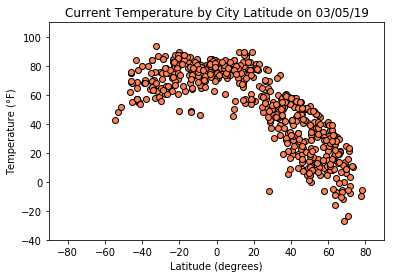

In [50]:
#define scatter plot and x/y axis data, plus some cosmetic formatting
plt.scatter(lat_ls, temp_ls, marker = "o", facecolors = "coral", edgecolors = "black")
#add labels
plt.title("Current Temperature by City Latitude on 03/05/19")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Temperature (°F)")
#set axis range
plt.ylim(-40, 110)
plt.xlim(-90, 90)
#save as png file
plt.savefig("lat_v_temp.png")
#show fig
plt.show()


#### Latitude vs. Humidity Plot

# Figure 2: Humidity versus Temperature

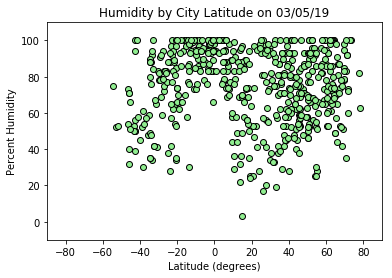

In [54]:
plt.scatter(lat_ls, hum_ls, marker = "o", facecolors = "lightgreen", edgecolors = "black")
plt.title("Humidity by City Latitude on 03/05/19")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Percent Humidity")
plt.ylim(-10, 110)
plt.xlim(-90, 90)
plt.savefig("lat_v_hum.png")
plt.show()

#### Latitude vs. Cloudiness Plot

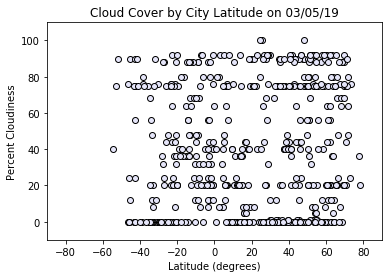

In [53]:
plt.scatter(lat_ls, clo_ls, marker = "o", facecolors = "lavender", edgecolors = "black")
plt.title("Cloud Cover by City Latitude on 03/05/19")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Percent Cloudiness")
plt.ylim(-10, 110)
plt.xlim(-90, 90)
plt.savefig("lat_v_cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

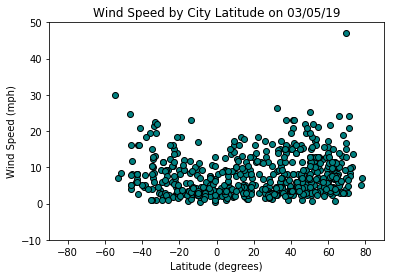

In [57]:
plt.scatter(lat_ls, wind_ls, marker = "o", facecolors = "teal", edgecolors = "black")
plt.title("Wind Speed by City Latitude on 03/05/19")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-10, 50)
plt.xlim(-90, 90)
plt.savefig("lat_v_wind.png")
plt.show()

# Figure 3: Latitude versus Longitude

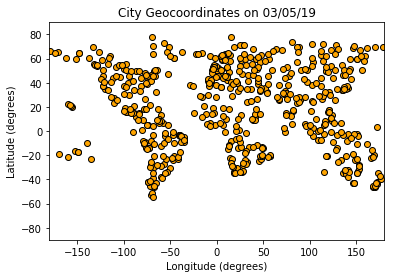

In [61]:
plt.scatter(lon_ls, lat_ls, marker = "o", facecolors = "orange", edgecolors = "black")
plt.title("City Geocoordinates on 03/05/19")
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.xlabel("Longitude (degrees)")
plt.ylabel("Latitude (degrees)")
plt.savefig("lat_v_lon.png")

plt.show()

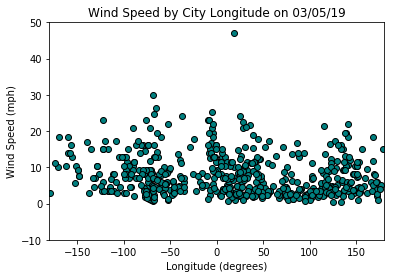

In [62]:
plt.scatter(lon_ls, wind_ls, marker = "o", facecolors = "teal", edgecolors = "black")
plt.title("Wind Speed by City Longitude on 03/05/19")
plt.xlabel("Longitude (degrees)")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-10, 50)
plt.xlim(-180, 180)
plt.savefig("lon_v_wind.png")
plt.show()

# Figure 4: Longitude versus Humidity

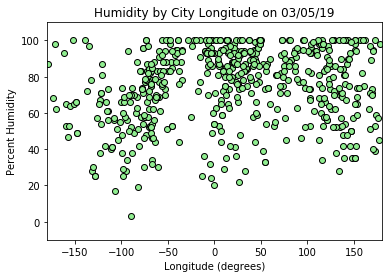

In [63]:
plt.scatter(lon_ls, hum_ls, marker = "o", facecolors = "lightgreen", edgecolors = "black")
plt.title("Humidity by City Longitude on 03/05/19")
plt.xlabel("Longitude (degrees)")
plt.ylabel("Percent Humidity")
plt.ylim(-10, 110)
plt.xlim(-180, 180)
plt.savefig("lon_v_hum.png")
plt.show()

# Figure 5: Cloudiness versus Humidity

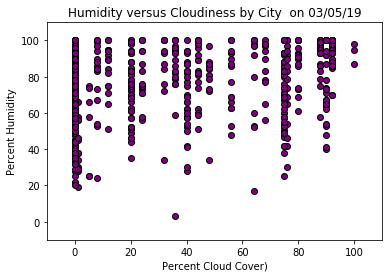

In [64]:
plt.scatter(clo_ls, hum_ls, marker = "o", facecolors = "purple", edgecolors = "black")
plt.title("Humidity versus Cloudiness by City  on 03/05/19")
plt.xlabel("Percent Cloud Cover)")
plt.ylabel("Percent Humidity")
plt.ylim(-10, 110)
plt.xlim(-10, 110)
plt.savefig("clo_v_hum.png")
plt.show()

### Map courtesy of https://www.mapsofworld.com/world-maps/world-map-with-latitude-and-longitude.html

![alt text](world-map-with-latitude-and-longitude.jpg "World Map with Geocoordinates")

# Angie's thoughts on this data:

---

* Movement away from the equator correlates with a drop in temperature (Figure 1). However, that correlation is not equally strong for the Northern and Southern Hemispheres. The equator has the longest amount of sun exposure per day, averaged over the year, which will cause temperatures to be higher. Southern Hemisphere cities (0 to -90° latitude)  range from around 80°F at the equator to 40°F at the furthest point away from the equater tested in this dataset. In contrast, Northern Hemisphere cities (0 to +90° latitude) ranges from around 80°F at the equator to -30°F away from the equator (Figure 1). Why is the Southern Hemisphere warmer overall and showing less temperature decreases with movement away from the equator?  One explanation is the 23° tilt of the Earth and the current placement in its orbit around the sun. In March, the Northern Hemisphere is tilted away from the sun and receives less direct sunlight per day than the Southern Hemisphere, so Northern temperature range would be expected to dip lower.  However, if the tilt of the Earth and the current date explained the entire trend, we would expect to see that the trend is reversed during summer for the Northern Hemisphere and that temperatures would dip much lower in the Southern Hemisphere. But the sample notebook data, collected in August during a Northern summer, shows equal decrease of temperatures with movement away from the equator, regardless of hemisphere; there is not a more dramatic decrease in temperature during the Southern winter. Rather there is another reason the Southern hemisphere maintains higher average temperatures year round.  The Southern Hemisphere has less land mass and more ocean than the Northern hemisphere.  As water acts as an insulator, it will hold warmth and maintain that warmth for a longer amount of time during the winter, leading to warmer winters than the Northern hemisphere. This insulating property may explain the equal distribution of temperautre around the equator seen in August's data, versus the unequal distribution seen in March's data. 

* There is a slight clustering of the highest humidity levels (90-100%) around the equator (Figure 2); however, a statistical analysis and additional sampling would be required to see if this trend is significant. An increase in humidity near the equator is likely a combination of the high temperatures in this region and that much of the land mass near the equator is near the ocean, where warmth will cause evaporation of the water. It would be interesting to see if local humidity was more related to proximity to bodies of water, rather than latitude. 

* I considered whether humidity would be correlated with higher cloud cover, as evaporation of water would increase humidity and contribute to cloud cover. Surprisingly, that correlation is not apparent (Figure 5), as cloud cover across the spectrum shows a wide range of humidity. This data might reflect a lack of correlation due to movement of clouds. They may move quickly and far away from their point of origin so that cloud cover doesn't represent places where clouds are more likley to form. Alternatively, there may be a pattern if one looks at the association between cloud cover and humidity over time, but not on a given day (as the present data includes). 

* I was curious to see if my random sample of 500+ cities was representative of the global land masses, so I plotted latitude versus longitude (Figure 3). The data points form an outline similar to the world map, suggesting that the sample is representative of the globe's land masses.  If anything, small islands might be overrepresented based on the number of points that overlap with the positions of oceans in Figure 3. 